# Predicting a Pulsar Star

In [39]:
#load the necessary modules
import pandas as pd
import numpy as np
from scipy.io import loadmat
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import datetime
import os
import warnings
warnings.filterwarnings("ignore")

In [7]:
def model_fit_report(model,x_values,y_values_actual,y_values_predicted,y_values_probability):
    print("Model Fit Results")
    print("")
    print ("Accuracy: %0.3f" % accuracy_score(y_values_actual,y_values_predicted))
    print("")
    print("Confusion Matrix")
    print("")
    print("")
    print("Classification Report")
    print("")
    print (classification_report(y_values_actual,y_values_predicted))

    

In [8]:
path = '../ten-datasets/'

#load the dataset into a dataframe
df = pd.read_csv(path + 'pulsar_stars.csv')

In [9]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [10]:
df.shape

(17898, 9)

In [11]:
df.target_class

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target_class, Length: 17898, dtype: int64

In [12]:
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]

X.shape
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_class, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0, stratify=y)

In [14]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(14318, 8)
(14318,)
(3580, 8)
(3580,)


In [15]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

# Shallow
> ### LogisticRegression

> ### DecisionTreeRegressor

## LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(C=100,max_iter = 100, tol=.1,solver='sag')

In [24]:
%%time
lr.fit(X_train, y_train)

CPU times: user 18.1 ms, sys: 2.33 ms, total: 20.4 ms
Wall time: 18.6 ms


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.1, verbose=0,
                   warm_start=False)

In [28]:
y_train_predict = lr.predict(X_train)
# y_train_predict = svm.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("Logistic Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))


Logistic Train Accuracy: 0.977


In [29]:
y_test_predict = lr.predict_proba(X_test).argmax(axis = 1)
print("Logistic Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))


Logistic Test Accuracy: 0.980


## DecisionTreeRegressor

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
%%time

tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

CPU times: user 135 ms, sys: 5.2 ms, total: 140 ms
Wall time: 143 ms


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
%%time
y_train_predict = tree.predict(X_train)
print ("tree Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

tree Train Accuracy: 1.000
CPU times: user 4.85 ms, sys: 1.88 ms, total: 6.73 ms
Wall time: 4.62 ms


In [37]:
%%time
y_test_predict = tree.predict(X_test)
print("tree Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

tree Test Accuracy: 0.970
CPU times: user 2.86 ms, sys: 1.78 ms, total: 4.64 ms
Wall time: 3 ms


# deep learning
> ### ANN 

> ### CNN

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.utils.vis_utils import plot_model

## ANN



In [43]:
X_train.shape

(14318, 8)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_17 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 2,469
Trainable params: 2,469
Non-trainable params: 0
_________________________________________________________________


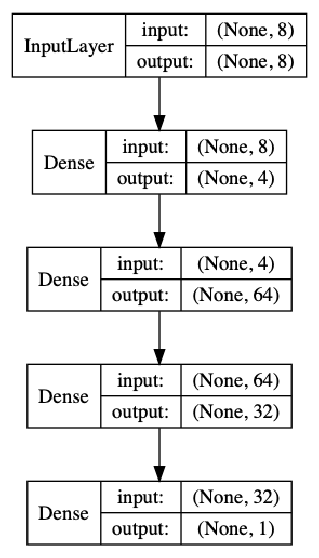

In [51]:
ann_model = Sequential()

ann_model.add(Dense(
        units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

ann_model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

ann_model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))


ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_model.summary()

image_name = 'plusarStars_ann_model.png'
plot_model(ann_model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10,10))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [59]:
ann_model.fit(X_train, y_train, batch_size=64, epochs=5)

hist = ann_model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

score = ann_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
14318/14318 [==============================] - 1s 36us/step - loss: 0.0739 - accuracy: 0.9795
Epoch 2/5
14318/14318 [==============================] - 0s 32us/step - loss: 0.0739 - accuracy: 0.9795
Epoch 3/5
14318/14318 [==============================] - 0s 32us/step - loss: 0.0729 - accuracy: 0.9798
Epoch 4/5
14318/14318 [==============================] - 0s 29us/step - loss: 0.0728 - accuracy: 0.9797
Epoch 5/5
14318/14318 [==============================] - 0s 31us/step - loss: 0.0727 - accuracy: 0.9798
Train on 14318 samples, validate on 3580 samples
Epoch 1/5
14318/14318 [==============================] - 0s 32us/step - loss: 0.0722 - accuracy: 0.9798 - val_loss: 0.0705 - val_accuracy: 0.9796
Epoch 2/5
14318/14318 [==============================] - 1s 35us/step - loss: 0.0721 - accuracy: 0.9797 - val_loss: 0.0694 - val_accuracy: 0.9818
Epoch 3/5
14318/14318 [==============================] - 1s 39us/step - loss: 0.0713 - accuracy: 0.9797 - val_loss: 0.0701 - val_accuracy: 

In [55]:
print(ann_model.metrics_names)
print(result)

['loss', 'accuracy']
[0.10681250196928418, 0.9787709712982178]


## CNN

In [73]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense

In [74]:
X_train_resh = X_train[:, :, np.newaxis]
X_test_resh = X_test[:, :, np.newaxis]
print(X_train_resh.shape)
print(y_train.shape)

print(X_test_resh.shape)
print(y_test.shape)

(14318, 8, 1)
(14318,)
(3580, 8, 1)
(3580,)


In [75]:
X_train_resh[0]

array([[-0.63397712],
       [-0.9819066 ],
       [-0.03306956],
       [-0.07815054],
       [-0.37014816],
       [-0.63049162],
       [ 0.7005112 ],
       [ 0.48032751]])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 8, 16)             64        
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 4, 16)             0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 16)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 4, 32)             1568      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 2, 32)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)              

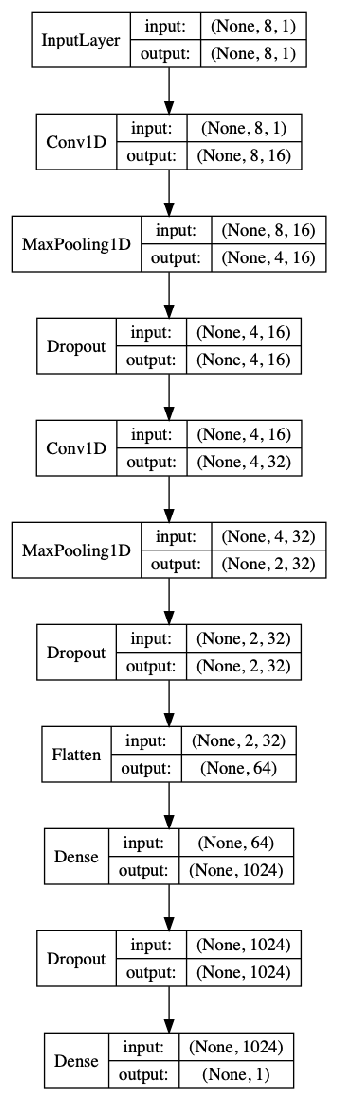

In [76]:
#bn_axis = 3

cnn_model = Sequential()

cnn_model.add(Conv1D(filters = 16, kernel_size = 3, activation='tanh', input_shape=X_train_resh.shape[1:],padding = 'same', strides=1))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv1D(filters = 32, kernel_size = 3,padding = 'same',activation='tanh',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='tanh'))
cnn_model.add(Dropout(0.25))
        
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])          

cnn_model.summary()

image_name = 'plusarStars_cnn_model.png'
plot_model(cnn_model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(20,20))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [78]:
X_test_resh.shape

(3580, 8, 1)

In [84]:
hist = cnn_model.fit(X_train_resh, y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test_resh, y_test)
                    )

score = cnn_model.evaluate(X_test_resh, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 14318 samples, validate on 3580 samples
Epoch 1/5
14318/14318 [==============================] - 1s 92us/step - loss: 0.0702 - accuracy: 0.9802 - val_loss: 0.0665 - val_accuracy: 0.9810
Epoch 2/5
14318/14318 [==============================] - 1s 79us/step - loss: 0.0710 - accuracy: 0.9790 - val_loss: 0.0669 - val_accuracy: 0.9818
Epoch 3/5
14318/14318 [==============================] - 1s 83us/step - loss: 0.0719 - accuracy: 0.9790 - val_loss: 0.0674 - val_accuracy: 0.9821
Epoch 4/5
14318/14318 [==============================] - 1s 81us/step - loss: 0.0703 - accuracy: 0.9796 - val_loss: 0.0693 - val_accuracy: 0.9793
Epoch 5/5
14318/14318 [==============================] - 1s 75us/step - loss: 0.0712 - accuracy: 0.9792 - val_loss: 0.0672 - val_accuracy: 0.9818
Test loss: 0.06721801092255049
Test accuracy: 0.9818435907363892


In [87]:
print(cnn_model.metrics_names)
print(result)

['loss', 'accuracy']
[0.06721801092255049, 0.9818435907363892]
